<a href="https://colab.research.google.com/github/bohuslavska/Hillel/blob/main/%D0%94%D0%97_3_%D0%91%D0%BE%D0%B3%D1%83%D1%81%D0%BB%D0%B0%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine Classifier (SVM, SVC)

Support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                             confusion_matrix, 
                             classification_report,
                             ConfusionMatrixDisplay)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
# model = SVC(kernel='poly', C=1E10)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)


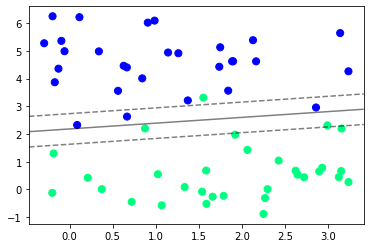

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=2, n_features=2,random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# clf = SVC(kernel='sigmoid').fit(X_train, y_train)
clf = SVC(kernel='linear').fit(X_train, y_train)

#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

plot_svc_decision_function(clf, plot_support=False);


In [ ]:
# print(len(y))
# print(len(X))

# print(X[10])
# print(y[10])

print(y_test)
print(clf.predict(X_test))



[1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1]
[1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1]


In [ ]:
df = pd.DataFrame()
df['predicted'] = clf.predict(X_test).astype(int)
df['labels'] = y_test.astype(int)
df['correct'] = np.where((df['predicted'] == df['labels']), True, False)

df.head(10)

,predicted,labels,correct
0,1,1,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,1,1,True
8,1,1,True
9,1,1,True


In [ ]:
# df[df.a > 1].sum()   

# Machine Learning metrics

### Classification Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. 
It is the ratio of number of correct predictions to the total number of input samples.
$$Accuracy=\frac{Number\:of\:Correct\:predictions}{Total\:number\:of\:predictions\:made}$$

It works well only if there are equal number of samples belonging to each class.

In [ ]:
#CODE THAT COMPUTES ACCURACY

from sklearn.metrics import accuracy_score

accuracy_score(df['labels'], df['predicted'])


0.9833333333333333

### Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.

Lets assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model on 165 samples ,we get the following result.
n=165  

  
|       -         |   Predicted: NO   |   Predicted: YES  |
|-----------------|-------------------|-------------------|
|   Actual  NO    |         50        |        10         |
|   Actual  YES   |         5         |       100         |

$$Confusion Matrix$$

There are 4 important terms :

* [True Positives](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) : The cases in which we predicted YES and the actual output was also YES.
* [True Negatives](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) : The cases in which we predicted NO and the actual output was NO.
* [False Positives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error) : The cases in which we predicted YES and the actual output was NO.
* [False Negatives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_negative_error) : The cases in which we predicted NO and the actual output was YES.

Accuracy for the matrix can be calculated by taking average of the values lying across the “<b>main diagonal</b>” i.e

$$Accuracy=\frac{True\:Positives+True\:Negatives}{Total\:Number\:of\:Samples}$$

Confusion Matrix forms the basis for the other types of metrics.

In [ ]:
### PUT HERE CODE THAT SHOWS CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(df['labels'], df['predicted'])
c_matrix

array([[29,  0],
       [ 1, 30]])

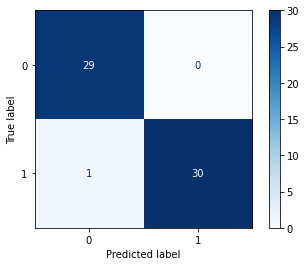

In [ ]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot(cmap=plt.cm.Blues);

### F1 Score

<i>F1 Score is used to measure a test’s accuracy</i>

F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :


$$F1=2\times\frac{Precision\times Recall}{Precision+Recall}$$

F1 Score tries to find the balance between precision and recall.

* <b>Precision</b> : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
$$Precision=\frac{True\:Positives}{True\:Positives+False\:Positives}$$


* <b>Recall</b> : It is the number of correct positive results divided by the number of <b>all</b> relevant samples (all samples that should have been identified as positive).
$$Recall=\frac{True\:Positives}{True\:Positives+False\:Negatives}$$

**CLASS PRACTICAL TASK 1**

In [ ]:
### CLASS PRACTICAL TASK 1
### INSERT HERE COMPUTATIONS FOR: ACC RC RP F1
### Do it from scratch and using scikit-learn api

def metrics (y_true, y_predicted):
   ACC = accuracy_score (y_true, y_predicted)
   F1 = f1_score (y_true, y_predicted)
   PR = precision_score (y_true, y_predicted)
   RC = recall_score (y_true, y_predicted)
   return ACC, F1, PR, RC

In [ ]:
metrics (df['labels'], df['predicted']) 

(0.9833333333333333, 0.9836065573770492, 1.0, 0.967741935483871)

In [ ]:
#OR

from sklearn.metrics import classification_report
classification_report(df['labels'], df['predicted'])


'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98        29\n           1       1.00      0.97      0.98        31\n\n    accuracy                           0.98        60\n   macro avg       0.98      0.98      0.98        60\nweighted avg       0.98      0.98      0.98        60\n'

In [ ]:
#OR

TN = c_matrix[0,0] 
FP = c_matrix[0,1]
FN = c_matrix[1,0]
TP = c_matrix[1,1]

ACC = (TP + TN)/ sum(sum(c_matrix))
PR = TP/(TP+FP)
RC = TP/(TP+FN)
F1 = 2 * (PR * RC)/ (PR + RC)

ACC, F1, PR, RC



(0.9833333333333333, 0.9836065573770492, 1.0, 0.967741935483871)

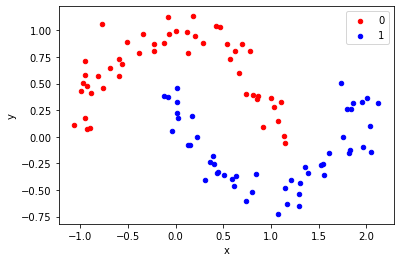

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**CLASS PRACTICAL TASK 2**

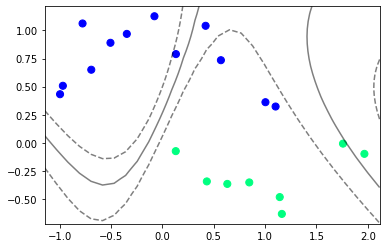

In [ ]:
### CLASS PRACTICAL TASK 2
### CONSIDERING DATA PROVIDED ONE CELL ABOVE TRAIN AN SVM CLASSIFIER
### AND PROVIDE MODEL EVALUATING AND CLASSES / DECISON BOUNDARY VISUALIZATION

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#kernel can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’

# clf = SVC(kernel='sigmoid').fit(X_train, y_train)
clf = SVC(kernel='sigmoid').fit(X_train, y_train)

#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

#Здесь DECISON BOUNDARY еще как-то нормально разделяет классы

plot_svc_decision_function(clf, plot_support=False);

### END YOUR BLOCK

In [ ]:
df = pd.DataFrame()
df ['predicted'] = clf.predict(X_test).astype(int)
df ['labels'] = y_test.astype(int)
df ['correct'] = np.where((df['predicted'] == df['labels']), True, False)
df.head(10)

,predicted,labels,correct
0,1,1,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,0,0,True
6,1,1,True
7,0,0,True
8,1,0,False
9,1,0,False


In [ ]:
metrics(df['labels'], df['predicted']) 

(0.75, 0.7368421052631579, 0.6363636363636364, 0.875)

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix (df['labels'], df['predicted'])
c_matrix

array([[8, 4],
       [1, 7]])

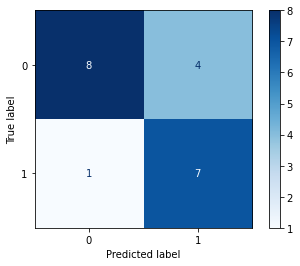

In [ ]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot(cmap=plt.cm.Blues);

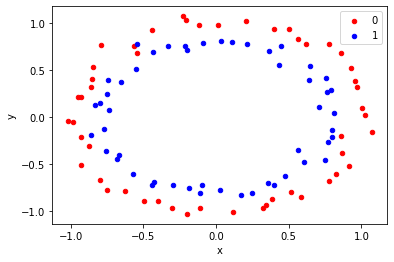

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


**CLASS PRACTICAL TASK 3**

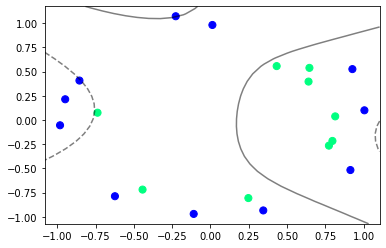

In [ ]:
### CLASS PRACTICAL TASK 3
### CONSIDERING DATA PROVIDED ONE CELL ABOVE TRAIN AN SVM CLASSIFIER
### AND PROVIDE MODEL EVALUATING AND CLASSES AND DECISON BOUNDARY VISUALIZATION

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# clf = SVC(kernel='sigmoid').fit(X_train, y_train)
clf = SVC(kernel='sigmoid').fit(X_train, y_train)

#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

#Здесь DECISON BOUNDARY очень странно разделяет классы

plot_svc_decision_function(clf, plot_support=False);


### AND YOUR BLOCK

In [ ]:
df = pd.DataFrame()
df['predicted'] = clf.predict(X_test).astype(int)
df['labels'] = y_test.astype(int)
df['correct'] = np.where((df['predicted'] == df['labels']), True, False)

df.head(10)

,predicted,labels,correct
0,0,1,False
1,0,1,False
2,0,1,False
3,0,1,False
4,0,1,False
5,1,0,False
6,1,0,False
7,1,1,True
8,0,0,True
9,1,0,False


In [ ]:
#Очень плохие метрики

metrics (df['labels'], df['predicted']) 


(0.35, 0.3157894736842105, 0.3, 0.3333333333333333)

In [ ]:
#Очень много ошибок

from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix (df['labels'], df['predicted'])
c_matrix

array([[4, 7],
       [6, 3]])

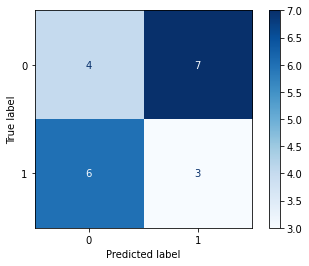

In [ ]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot(cmap=plt.cm.Blues);

## Grid Search

Accordint to [wikipedia](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search) has following definition:

*The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.*


Learn about different kernels and hyperparameters for SVC in scikit-learn [here](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

In [ ]:
### CLASS PRACTICAL TASK 4 - Do here OR in separate nbook
### ASSUMING DATA COME FROM UNKNOWN SOURCE AND HAVE UNKNOWN INTERNAL 
### DISTRIBUTION FORM WE NEED TO DESING A CUSTOM FUNCTION FOR GRID SEARCH
### OVER SVM CLASSIFIERS WITH DIFFERENT KERNELS AND HYPERPARAMETERS.
### FUNCTION MUST HAVE FOLLOWING PROTOTYPE
def find_classifier_grid(X, y):
  
      
        
  
  ### Here you should provide a loop 
  ### That goes throug 5 - 100 predefined options for SVM classifiers
  ### with different kernels and additiona hypperparams
  ### Train each model, evaluate, take the model with best f1 metric
  ### and return the classifier instrance itself as 'clf'
  ### and all SVM hyperparams including kernel inside 'hyperparams' dictionary

  return clf, hyperparams

### END YOUR BLOCK